In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d

In [5]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 3, 50)
X, Y = np.meshgrid(x, y)

f = lambda x, y: x**2 + y**4
Z = f(X, Y)

g = lambda x, y: np.array([2*x, 4*y**3])

x0 , y0 = 1, 1

gv = g(x0, y0)
e_g = gv / np.linalg.norm(gv, ord=2)

print(gv, e_g)

[2 4] [0.4472136  0.89442719]


Text(0.5, 0, 'Вектор градиента функции $x^2+y^4$ в точке $(1,1)$')

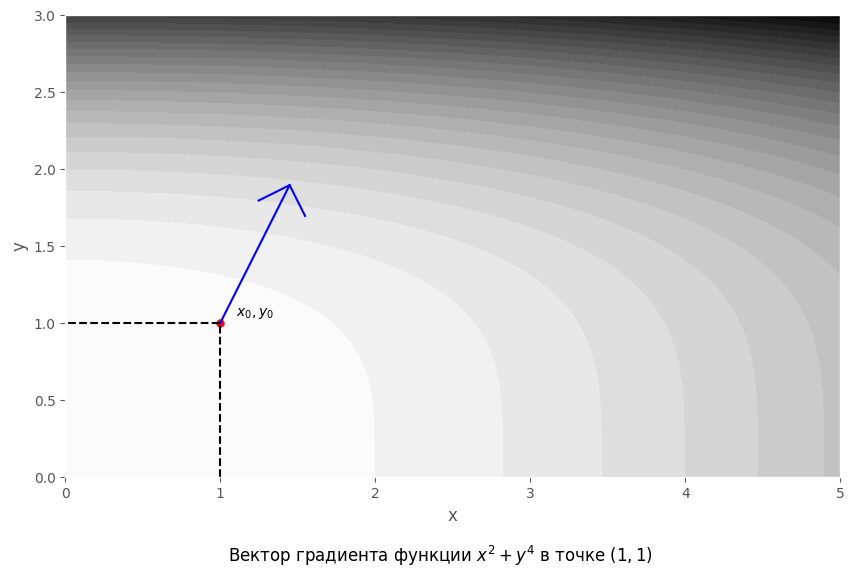

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.contourf(X, Y, Z, 30, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 5)
ax.set_ylim(0, 3)
ax.scatter([x0, x0+gv[0]], [y0, y0+gv[1]], s=30, c='r')
ax.plot([x0, x0+e_g[0]], [y0, y0+e_g[1]], c='b')
ax.plot([x0, x0, 0], [0, y0, y0], '--', c='black')
ax.plot([x0+e_g[0]-0.2, x0+e_g[0], x0+e_g[0]+0.1], [y0+e_g[1]-0.1, y0+e_g[1], y0+e_g[1]-0.2], c='b')

ax.text(1.1, 1.05, '$x_0, y_0$', color='black')
fig.suptitle('Вектор градиента функции $x^2+y^4$ в точке $(1,1)$', y=0)

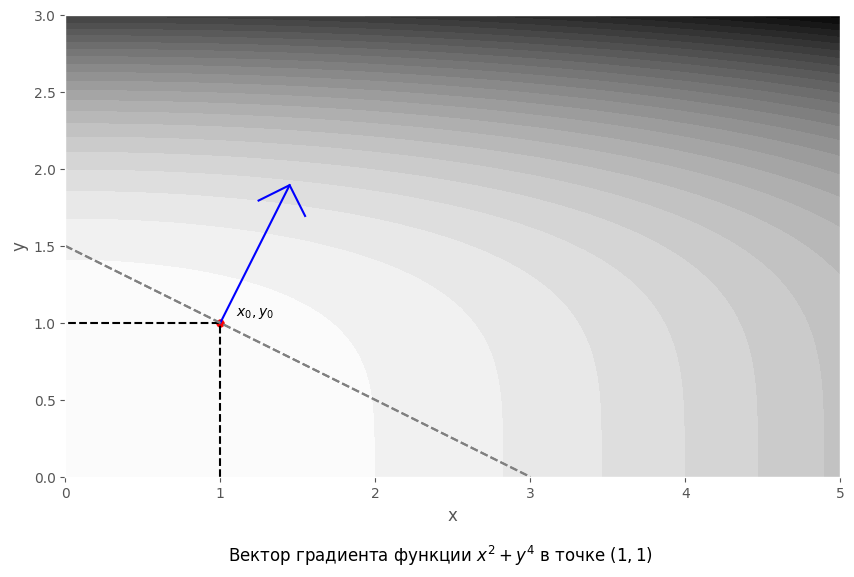

In [15]:
fig.suptitle('Вектор градиента функции $x^2+y^4$ в точке $(1,1)$', y=0)
ax.plot([0, 3], [1.5, 0], linestyle='dashed', c='grey' )
fig

In [32]:
def grad_desc(g, r, alpha=0.01, eps_g = 0.1, maxiters=100):
    iter = 0
    trace = [r]
    while np.linalg.norm(g(r[0], r[1])) > eps_g and iter < maxiters:
        r = r - alpha*g(r[0], r[1])
        trace.append(r)
        iter += 1
    return trace

r0 = np.array([3, 2])
x0, y0 = r0
alpha = 0.1
g = lambda x, y: np.array([2*x, 4*y**3])
trace = grad_desc(g, r0, alpha)
trace = np.array(trace).T
print(trace.T)

[[ 3.          2.        ]
 [ 2.4        -1.2       ]
 [ 1.92       -0.5088    ]
 [ 1.536      -0.45611326]
 [ 1.2288     -0.41815747]
 [ 0.98304    -0.38891059]
 [ 0.786432   -0.36538127]
 [ 0.6291456  -0.3458694 ]
 [ 0.50331648 -0.32931946]
 [ 0.40265318 -0.31503341]
 [ 0.32212255 -0.30252708]
 [ 0.25769804 -0.29145185]
 [ 0.20615843 -0.281549  ]
 [ 0.16492674 -0.27262166]
 [ 0.1319414  -0.26451688]
 [ 0.10555312 -0.25711367]
 [ 0.08444249 -0.25031482]
 [ 0.06755399 -0.24404118]
 [ 0.0540432  -0.23822752]
 [ 0.04323456 -0.23281953]
 [ 0.03458765 -0.22777155]]


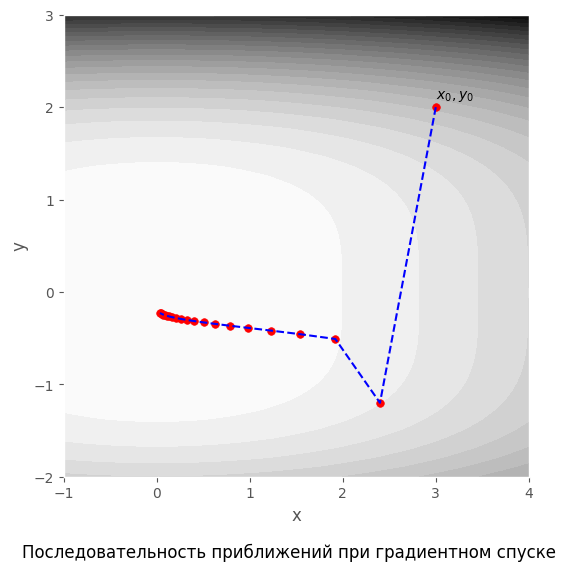

In [28]:
x = np.linspace(-1, 4, 50)
y = np.linspace(-2, 3, 50)
X, Y = np.meshgrid(x, y)

f = lambda x, y: x**2 + y**4
Z = f(X, Y)

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(X, Y, Z, 30, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 4)
ax.set_ylim(-2, 3)
ax.scatter(trace[0], trace[1], s=30, c='r')
ax.plot(trace[0], trace[1], '--', c='b')

ax.text(r0[0], r0[1]+0.1, '$x_0, y_0$', color='black')
fig.suptitle('Последовательность приближений при градиентном спуске', y=0)
plt.show()